<a href="https://colab.research.google.com/github/ZizZu94/GFP-GAN/blob/main/gfp_gan_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiments with **GFP GAN**

Paper name: **Towards Real-World Blind Face Restoration with Generative Facial Prior**

GFPGAN is a blind face restoration algorithm towards real-world face images.

Submitted on `11 Jan 2021`

Author names: `Xintao Wang`, `Yu Li`, `Honglun Zhang`, `Ying Shan`

Website link: https://xinntao.github.io/projects/gfpgan

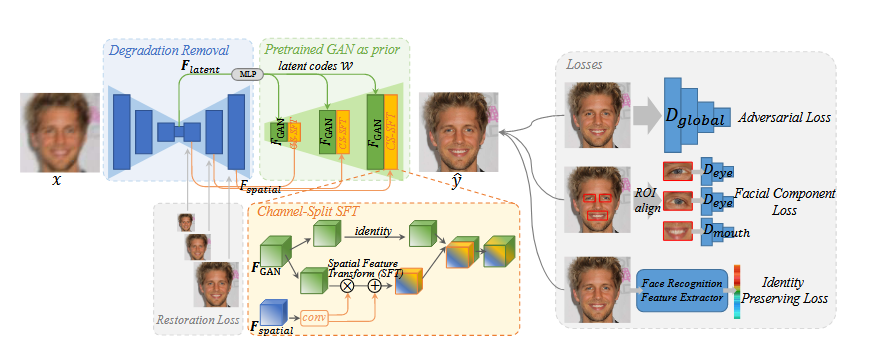


Overview of GFP-GAN framework. It consists of a degradation removal module (U-Net) and a pretrained
face GAN as facial prior. They are bridged by a latent code mapping and several Channel-Split Spatial Feature Transform
(CS-SFT) layers. During training, we employ 1) intermediate restoration losses to remove complex degradation, 2) Facial
component loss with discriminators to enhance facial details, and 3) identity preserving loss to retain face identity.

## Mount Google Drive
Create a folder in your drive space for GFP GAN project.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/GFP-GAN

In [ ]:
!ls

## 1. Setup

In [ ]:
# clone GFP GAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

# Set up the environment
# Install basicsr - https://github.com/xinntao/BasicSR
# We use BasicSR for both training and inference
!pip install basicsr
# Install facexlib - https://github.com/xinntao/facexlib
# We use face detection and face restoration helper in the facexlib package
!pip install facexlib
# Install other depencencies
!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions
# Download the pre-trained model
!wget https://github.com/TencentARC/GFPGAN/releases/download/v0.2.0/GFPGANCleanv1-NoCE-C2.pth -P experiments/pretrained_models

In [ ]:
!ls

In [12]:
# input image folder
input_dir_path = '../input-img'

## 2. Inference

In [ ]:
# Now we use the GFPGAN to restore the above low-quality images
# We use [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN) for enhancing the background (non-face) regions
!rm -rf results
!python inference_gfpgan.py --upscale 2 --test_path ../input-img --save_root results --model_path experiments/pretrained_models/GFPGANCleanv1-NoCE-C2.pth --bg_upsampler realesrgan

!ls results/cmp

In [22]:
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

### Visualize cropped faces

In [ ]:
input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

### Visualize the whole image

In [ ]:
input_folder = '../input-img'
result_folder = 'results/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

## 3. Save images

In [26]:
# copy otput images from project folder to google drive folder
!cp -a results/restored_imgs/ ../output-img